In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model #For missing values
from sklearn.preprocessing import StandardScaler #For scaling features

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor #Random Forest Regressor
from sklearn.ensemble import BaggingRegressor #Bagging Regressor
from sklearn.neighbors import KNeighborsRegressor #KNN Regressor
from sklearn.linear_model import LinearRegression #Linear Regressor

In [9]:
data = pd.read_csv(r'/Users/mallikayeturi/Downloads/Apps_data+(1).csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
data.shape

(10841, 13)

In [11]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [17]:
data.isnull().sum()

Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [18]:
data[data['Rating'] > 5]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [19]:
data['Category'].unique().tolist()

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION',
 '1.9']

In [20]:
rec = data[data['Category'] == '1.9'].index
data = data.drop(rec)

In [21]:
train_data = data.copy()

In [22]:
train_data['Price'] = train_data['Price'].apply(lambda x : x.strip('$'))
# Cleaning "Installs" column
train_data['Installs'] = train_data['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [23]:
train_data['Price'] = train_data['Price'].astype(float)
train_data['Installs'] = train_data['Installs'].astype(float)
train_data['Reviews'] = train_data['Reviews'].astype(float)

In [24]:
rec = train_data[train_data['Type'].isnull()].index
train_data = train_data.drop(rec)


In [25]:
col_list = [c for c in train_data.columns if train_data[c].dtype == 'object']
col_list

['Category', 'Size', 'Type', 'Content Rating', 'Genres']

In [26]:
for c in col_list:
    if c != 'Size':
        train_data[c] = train_data[c].astype('category')
        train_data[c] = train_data[c].cat.codes

In [27]:
print(data['Type'].unique().tolist())
print(train_data['Type'].unique().tolist(), '\n')

['Free', 'Paid', nan]
[0, 1] 



In [28]:
train_data.loc[train_data['Size'] == 'Varies with device', 'Size'] = np.nan

In [29]:
train_data.Size = (train_data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             train_data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [30]:
train_data.isnull().sum()

Category             0
Rating            1473
Reviews              0
Size              1694
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

In [31]:
X = train_data[train_data['Size'].notnull()]
y = train_data.loc[train_data['Size'].notnull(), 'Size']
X = X.drop(columns=['Size', 'Rating'])

# Fit the model
model = linear_model.LinearRegression()
model.fit(X, y)

# Get all rows with null values
X_miss = train_data[train_data['Size'].isnull()]
X_miss = X_miss.drop(columns = ['Size', 'Rating'])

# Fill the predicted values
train_data.loc[train_data['Size'].isnull(), 'Size'] = model.predict(X_miss)

In [32]:
X = train_data[train_data['Rating'].notnull()]
y = train_data.loc[train_data['Rating'].notnull(), 'Rating']
X = X.drop(columns=['Rating'])

# Fit model
model = linear_model.LinearRegression()
model.fit(X, y)

# Get all rows with null values
X_miss = train_data[train_data['Rating'].isnull()]
X_miss = X_miss.drop(columns = ['Rating'])

# Fill the predicted values
train_data.loc[train_data['Rating'].isnull(), 'Rating'] = model.predict(X_miss)

In [33]:
train_data.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [34]:
train_data.dtypes

Category             int8
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type                 int8
Price             float64
Content Rating       int8
Genres               int8
dtype: object

In [35]:
train_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159.0,19000000.0,10000.0,0,0.0,1,9
1,0,3.9,967.0,14000000.0,500000.0,0,0.0,1,12
2,0,4.7,87510.0,8700000.0,5000000.0,0,0.0,1,9
3,0,4.5,215644.0,25000000.0,50000000.0,0,0.0,4,9
4,0,4.3,967.0,2800000.0,100000.0,0,0.0,1,11


<Axes: >

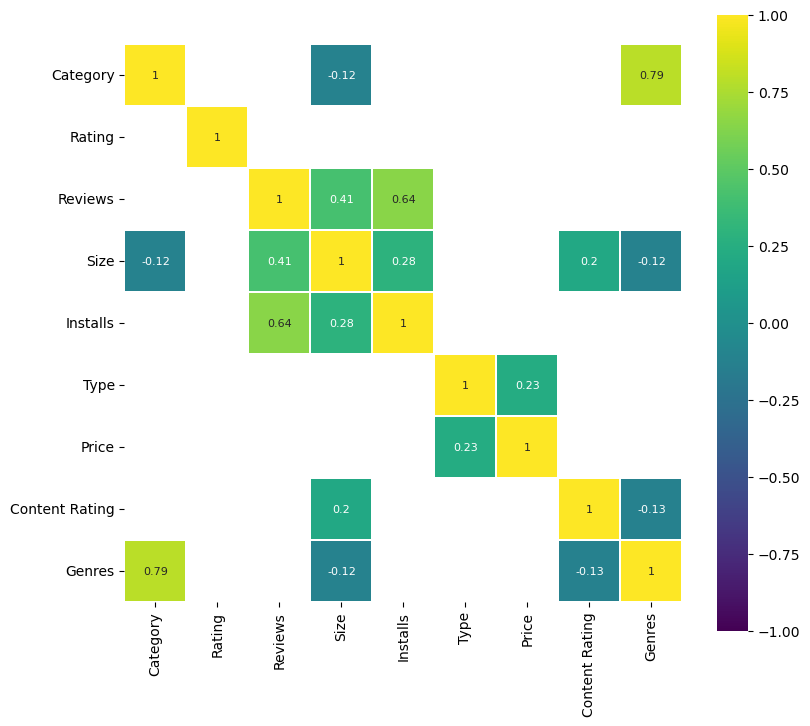

In [36]:
corr = train_data.corr() 
plt.figure(figsize=(9, 8))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

Text(0.5, 1.0, 'Distribution of Rating')

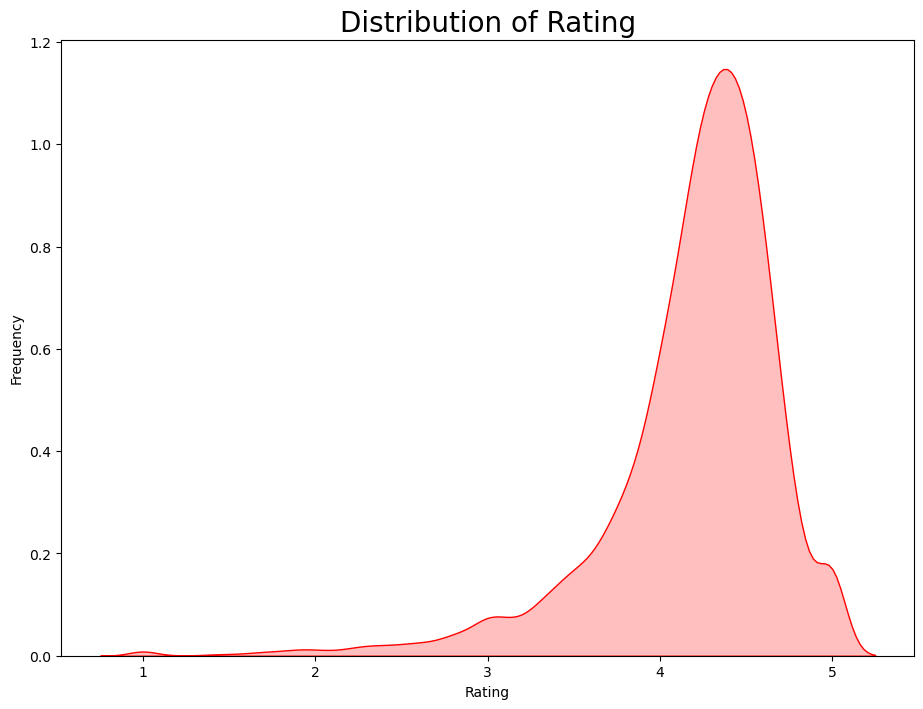

In [37]:
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

# rating distibution 
rcParams['figure.figsize'] = 11,8
g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

Text(0.5, 1.0, 'Count of app in each category')

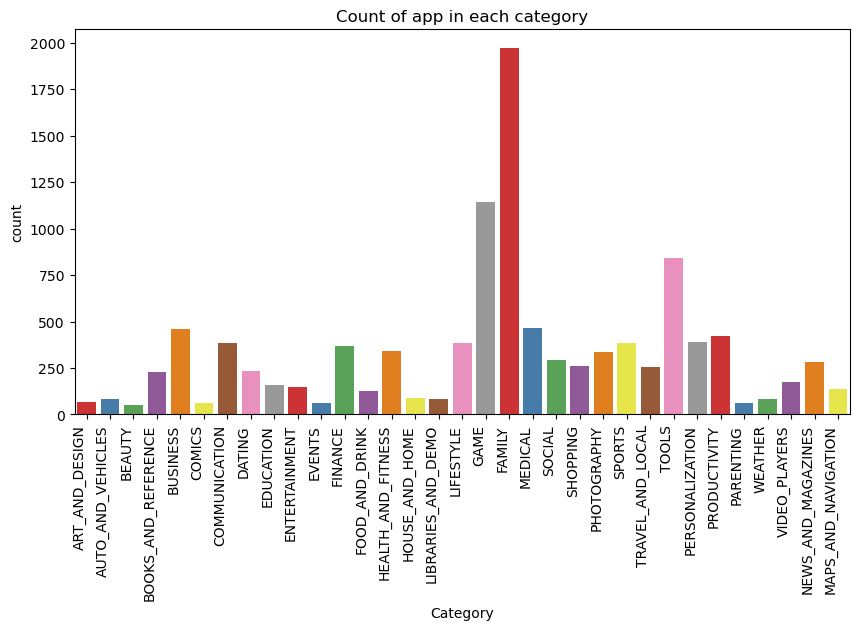

In [38]:
plt.figure(figsize=(10, 5))
g = sns.countplot(x="Category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category')

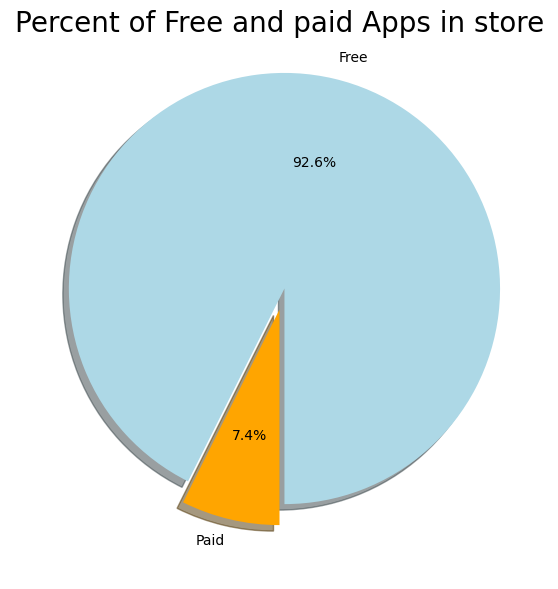

In [39]:
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)


colors = ["lightblue","orange"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 7,7
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free and paid Apps in store',size = 20)
plt.show()

In [40]:
cols = ['Category', 'Type', 'Content Rating', 'Genres', 'Rating']

# Pick remaining columns and standardize them 
columns = [c for c in train_data.columns if c not in cols]
scaler = StandardScaler()
scaler.fit(train_data[columns])
train_data[columns] = scaler.transform(train_data[columns])

# Check data after standarization
train_data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,-0.151664,-0.140860,-0.181770,0,-0.064419,1,9
1,0,3.9,-0.151388,-0.366005,-0.176007,0,-0.064419,1,12
2,0,4.7,-0.121828,-0.604659,-0.123084,0,-0.064419,1,9
3,0,4.5,-0.078063,0.129314,0.406145,0,-0.064419,4,9
4,0,4.3,-0.151388,-0.870330,-0.180712,0,-0.064419,1,11


In [41]:
y = train_data['Rating']
X = train_data.drop(columns=['Rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (8671, 8)
Validation Set Dimensions: (2168, 8)


In [42]:
randomf = RandomForestRegressor(n_estimators=300)
randomf.fit(X_train, y_train)

# Measure mean squared error for training and validation sets
print('Mean squared Error for Training Set:', mean_squared_error(y_train, randomf.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, randomf.predict(X_test)))

Mean squared Error for Training Set: 0.0267081173468877
Mean squared Error for Test Set: 0.21954083453394163


In [43]:
randomf = RandomForestRegressor(n_estimators=300)
randomf.fit(X_train, y_train)

# Measure mean squared error for training and validation sets
print('Mean squared Error for Training Set:', mean_squared_error(y_train, randomf.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, randomf.predict(X_test)))

Mean squared Error for Training Set: 0.02664266355896955
Mean squared Error for Test Set: 0.22068122428033582


feature: Category = 0.10156764418274764
feature: Reviews = 0.3474612814366245
feature: Size = 0.2877604341149075
feature: Installs = 0.09670276799059592
feature: Type = 0.004948044087126639
feature: Price = 0.024432529977666692
feature: Content Rating = 0.02678385976880198
feature: Genres = 0.11034343844152901


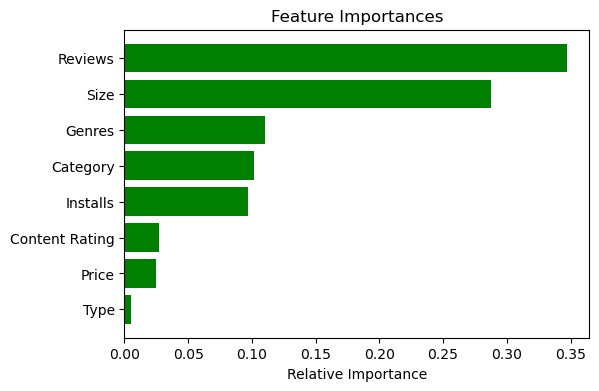

In [44]:
for name, importance in zip(X.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)
    
importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.figure(figsize=(6, 4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [45]:
br = BaggingRegressor(random_state=300)
                            
br.fit(X_train, y_train)

# Measure mean squared error for training and validation sets
print('Mean squared Error for Training Set:', mean_squared_error(y_train, br.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, br.predict(X_test)))

Mean squared Error for Training Set: 0.036398523465626054
Mean squared Error for Test Set: 0.23617858989300308


In [46]:
knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(X_train, y_train)

# Measure mean squared error for training and validation sets
print('Mean squared Error for Training Set:', mean_squared_error(y_train, knr.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, knr.predict(X_test)))

Mean squared Error for Training Set: 0.15938310101105405
Mean squared Error for Test Set: 0.26067077619081813


In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

# Measure mean squared error for training and validation sets
print('Mean squared Error for Training Set:', mean_squared_error(y_train, model.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, model.predict(X_test)))

Mean squared Error for Training Set: 0.2220255566846853
Mean squared Error for Test Set: 0.24420730646496183


Above all techniques, Regressor performed best with testing mean squared error of 0.19

Hyper-parameter tuning can be performed on this data and there are a couple of ways to do this but an efficient solution is using Grid-Search-Cross-Validation approach where we have to form a grid of parameters and iteratively apply cross-validation to find the best set of parameters for which model performs the best.